In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [4]:
# First, we get the data
dataset = pd.read_csv('khariar_spi3.csv')
dataset

,sl.no,spi
0,1,-0.35
1,2,-0.42
2,3,0.09
3,4,0.78
4,5,1.13
...,...,...
485,486,1.25
486,487,1.37
487,488,0.88
488,489,0.62


In [5]:
# Checking for missing values
# training_set = dataset[:'360'].iloc[:,1:2].values
# test_set = dataset['361':].iloc[:,1:2].values
# Checking for missing values
training_set = dataset.iloc[:361, 1:2].values
test_set = dataset.iloc[361:, 1:2].values


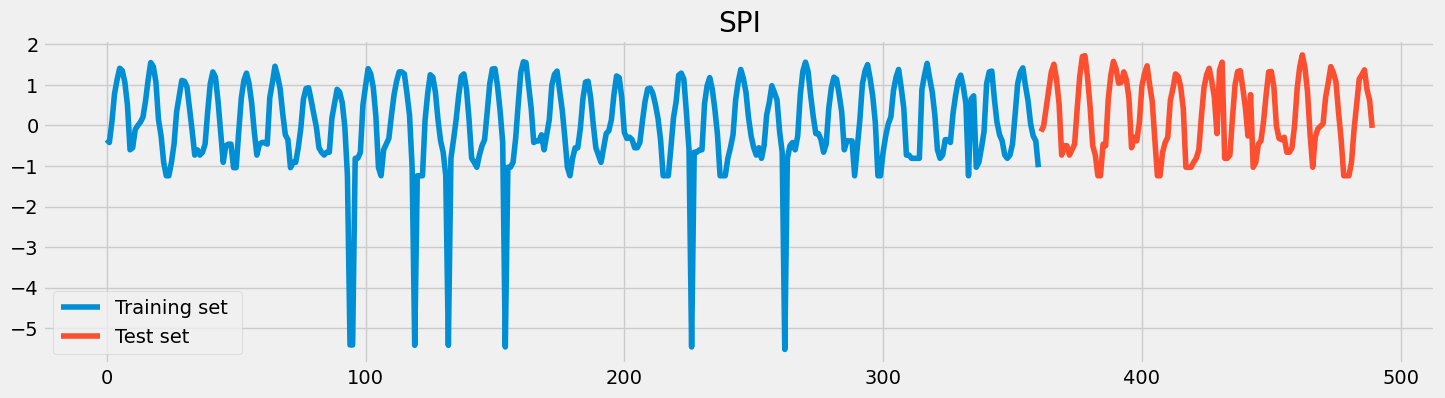

In [6]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["spi"][:361].plot(figsize=(16,4),legend=True)
dataset["spi"][361:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set ','Test set '])
plt.title('SPI')
plt.show()

In [7]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,361):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [10]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=500,batch_size=8)

Epoch 1/500
38/38 [==============================] - 144s 191ms/step - loss: 0.0724
Epoch 2/500
38/38 [==============================] - 7s 172ms/step - loss: 0.0450
Epoch 3/500
38/38 [==============================] - 6s 151ms/step - loss: 0.0409
Epoch 4/500
38/38 [==============================] - 6s 150ms/step - loss: 0.0365
Epoch 5/500
38/38 [==============================] - 6s 147ms/step - loss: 0.0390
Epoch 6/500
38/38 [==============================] - 6s 152ms/step - loss: 0.0358
Epoch 7/500
38/38 [==============================] - 6s 164ms/step - loss: 0.0365
Epoch 8/500
38/38 [==============================] - 6s 158ms/step - loss: 0.0336
Epoch 9/500
38/38 [==============================] - 6s 159ms/step - loss: 0.0357
Epoch 10/500
38/38 [==============================] - 6s 149ms/step - loss: 0.0294
Epoch 11/500
38/38 [==============================] - 5s 132ms/step - loss: 0.0330
Epoch 12/500
38/38 [==============================] - 6s 169ms/step - loss: 0.0340
Epoch 13/50

38/38 [==============================] - 6s 171ms/step - loss: 0.0141
Epoch 100/500
38/38 [==============================] - 7s 185ms/step - loss: 0.0144
Epoch 101/500
38/38 [==============================] - 7s 173ms/step - loss: 0.0137
Epoch 102/500
38/38 [==============================] - 7s 181ms/step - loss: 0.0148
Epoch 103/500
38/38 [==============================] - 7s 177ms/step - loss: 0.0140
Epoch 104/500
38/38 [==============================] - 7s 176ms/step - loss: 0.0137
Epoch 105/500
38/38 [==============================] - 7s 172ms/step - loss: 0.0135
Epoch 106/500
38/38 [==============================] - 7s 199ms/step - loss: 0.0145
Epoch 107/500
38/38 [==============================] - 7s 190ms/step - loss: 0.0141
Epoch 108/500
38/38 [==============================] - 7s 184ms/step - loss: 0.0135
Epoch 109/500
38/38 [==============================] - 8s 220ms/step - loss: 0.0147
Epoch 110/500
38/38 [==============================] - 9s 233ms/step - loss: 0.0143
Epoch 

38/38 [==============================] - 7s 172ms/step - loss: 0.0133
Epoch 197/500
38/38 [==============================] - 7s 193ms/step - loss: 0.0126
Epoch 198/500
38/38 [==============================] - 7s 180ms/step - loss: 0.0130
Epoch 199/500
38/38 [==============================] - 7s 179ms/step - loss: 0.0128
Epoch 200/500
38/38 [==============================] - 6s 169ms/step - loss: 0.0137
Epoch 201/500
38/38 [==============================] - 7s 175ms/step - loss: 0.0130
Epoch 202/500
38/38 [==============================] - 7s 187ms/step - loss: 0.0137
Epoch 203/500
38/38 [==============================] - 6s 161ms/step - loss: 0.0127
Epoch 204/500
38/38 [==============================] - 6s 157ms/step - loss: 0.0133
Epoch 205/500
38/38 [==============================] - 6s 166ms/step - loss: 0.0129
Epoch 206/500
38/38 [==============================] - 7s 181ms/step - loss: 0.0124
Epoch 207/500
38/38 [==============================] - 7s 181ms/step - loss: 0.0130
Epoch 

38/38 [==============================] - 7s 184ms/step - loss: 0.0119
Epoch 294/500
38/38 [==============================] - 6s 165ms/step - loss: 0.0123
Epoch 295/500
38/38 [==============================] - 7s 166ms/step - loss: 0.0127
Epoch 296/500
38/38 [==============================] - 6s 160ms/step - loss: 0.0127
Epoch 297/500
38/38 [==============================] - 7s 183ms/step - loss: 0.0124
Epoch 298/500
38/38 [==============================] - 6s 172ms/step - loss: 0.0121
Epoch 299/500
38/38 [==============================] - 7s 182ms/step - loss: 0.0131
Epoch 300/500
38/38 [==============================] - 7s 174ms/step - loss: 0.0127
Epoch 301/500
38/38 [==============================] - 7s 176ms/step - loss: 0.0126
Epoch 302/500
38/38 [==============================] - 7s 179ms/step - loss: 0.0125
Epoch 303/500
38/38 [==============================] - 6s 163ms/step - loss: 0.0125
Epoch 304/500
38/38 [==============================] - 7s 187ms/step - loss: 0.0120
Epoch 

38/38 [==============================] - 7s 177ms/step - loss: 0.0120
Epoch 391/500
38/38 [==============================] - 7s 172ms/step - loss: 0.0120
Epoch 392/500
38/38 [==============================] - 7s 187ms/step - loss: 0.0123
Epoch 393/500
38/38 [==============================] - 7s 171ms/step - loss: 0.0123
Epoch 394/500
38/38 [==============================] - 7s 182ms/step - loss: 0.0119
Epoch 395/500
38/38 [==============================] - 6s 169ms/step - loss: 0.0120
Epoch 396/500
38/38 [==============================] - 7s 172ms/step - loss: 0.0118
Epoch 397/500
38/38 [==============================] - 6s 163ms/step - loss: 0.0122
Epoch 398/500
38/38 [==============================] - 6s 165ms/step - loss: 0.0121
Epoch 399/500
38/38 [==============================] - 8s 198ms/step - loss: 0.0118
Epoch 400/500
38/38 [==============================] - 7s 178ms/step - loss: 0.0122
Epoch 401/500
38/38 [==============================] - 7s 170ms/step - loss: 0.0124
Epoch 

38/38 [==============================] - 4s 111ms/step - loss: 0.0118
Epoch 488/500
38/38 [==============================] - 4s 109ms/step - loss: 0.0110
Epoch 489/500
38/38 [==============================] - 4s 104ms/step - loss: 0.0114
Epoch 490/500
38/38 [==============================] - 4s 107ms/step - loss: 0.0113
Epoch 491/500
38/38 [==============================] - 4s 96ms/step - loss: 0.0116
Epoch 492/500
38/38 [==============================] - 4s 108ms/step - loss: 0.0114
Epoch 493/500
38/38 [==============================] - 4s 114ms/step - loss: 0.0113
Epoch 494/500
38/38 [==============================] - 4s 110ms/step - loss: 0.0114
Epoch 495/500
38/38 [==============================] - 4s 110ms/step - loss: 0.0114
Epoch 496/500
38/38 [==============================] - 4s 109ms/step - loss: 0.0112
Epoch 497/500
38/38 [==============================] - 4s 104ms/step - loss: 0.0114
Epoch 498/500
38/38 [==============================] - 4s 105ms/step - loss: 0.0110
Epoch 4

In [12]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["spi"][:361],dataset["spi"][361:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [13]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,189):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

5/5 [==============================] - 8s 21ms/step


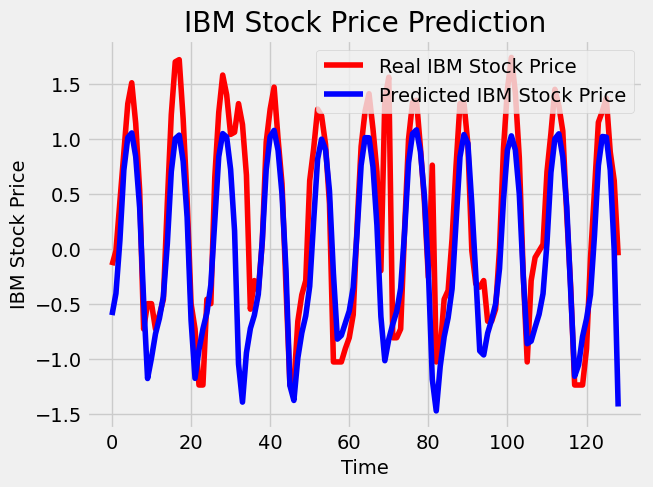

In [14]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [15]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)


The root mean squared error is 0.6152261344505883.


In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_evaluation_metrics(y_observed, y_predicted):
     # Convert to NumPy arrays if they are lists
    if isinstance(y_observed, list):
        y_observed = np.array(y_observed)
    if isinstance(y_predicted, list):
        y_predicted = np.array(y_predicted)
        
    metrics = {}

    # Calculate ME (Mean Error)
    metrics['ME'] = np.mean(y_observed - y_predicted)

    # Calculate MAE (Mean Absolute Error)
    metrics['MAE'] = mean_absolute_error(y_observed, y_predicted)

    # Calculate MSE (Mean Squared Error)
    metrics['MSE'] = mean_squared_error(y_observed, y_predicted)

    # Calculate RMSE (Root Mean Squared Error)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Calculate NRMSE (Normalized Root Mean Squared Error)
    metrics['NRMSE'] = metrics['RMSE'] / (np.max(y_observed) - np.min(y_observed))

    # Calculate PBIAS (Percent Bias)
    metrics['PBIAS'] = np.mean(100 * (y_observed - y_predicted) / np.mean(y_observed))

    # Calculate RSR (Root Mean Square Ratio)
    metrics['RSR'] = metrics['RMSE'] / np.std(y_observed)

    # Calculate rSD (Ratio of the Standard Deviation)
    metrics['rSD'] = np.std(y_observed - y_predicted) / np.std(y_observed)

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    metrics['NSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate mNSE (Modified Nash-Sutcliffe Efficiency)
    metrics['mNSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate rNSE (Relative Nash-Sutcliffe Efficiency)
    metrics['rNSE'] = metrics['NSE'] / np.var(y_observed)

    # Calculate d (Index of Agreement)
    metrics['d'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                       np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate md (Modified d Index)
    metrics['md'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate rd (Relative d Index)
    metrics['rd'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate cp (Coefficient of Performance)
    metrics['cp'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                         np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate r (Index of Agreement)
    metrics['r'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                        np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate R2 (Coefficient of Determination)
    metrics['R2'] = r2_score(y_observed, y_predicted)

    return metrics


In [17]:
evaluation_metrics = calculate_evaluation_metrics(test_set,predicted_stock_price)
print(evaluation_metrics)

{'ME': 0.31462561662287214, 'MAE': 0.4103562622794579, 'MSE': 0.37850319651101333, 'RMSE': 0.6152261344505883, 'NRMSE': 0.20645172296999606, 'PBIAS': 113.05488731016854, 'RSR': 0.6962853253935397, 'rSD': 0.598348470648789, 'NSE': 0.5151867456416124, 'mNSE': 0.5151867456416124, 'rNSE': 0.6598870631982876, 'd': 0.8657564238397306, 'md': 0.8657564238397306, 'rd': 0.8657564238397306, 'cp': 0.8657564238397306, 'r': 0.8657564238397306, 'R2': 0.5151867456416124}


Truth be told. That's one awesome score. 

LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have **Gated Recurrent Units(GRU)**. It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

## Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195">

In [18]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=500,batch_size=8)

C:\Users\asitg\anaconda3\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/500
38/38 [==============================] - 39s 126ms/step - loss: 0.0937
Epoch 2/500
38/38 [==============================] - 5s 127ms/step - loss: 0.0319
Epoch 3/500
38/38 [==============================] - 5s 135ms/step - loss: 0.0298
Epoch 4/500
38/38 [==============================] - 5s 136ms/step - loss: 0.0298
Epoch 5/500
38/38 [==============================] - 5s 132ms/step - loss: 0.0302
Epoch 6/500
38/38 [==============================] - 6s 148ms/step - loss: 0.0295
Epoch 7/500
38/38 [==============================] - 6s 170ms/step - loss: 0.0311
Epoch 8/500
38/38 [==============================] - 6s 162ms/step - loss: 0.0289
Epoch 9/500
38/38 [==============================] - 6s 170ms/step - loss: 0.0300
Epoch 10/500
38/38 [==============================] - 6s 168ms/step - loss: 0.0286
Epoch 11/500
38/38 [==============================] - 6s 157ms/step - loss: 0.0286
Epoch 12/500
38/38 [==============================] - 6s 164ms/step - loss: 0.0301
Epoch 13/500

38/38 [==============================] - 8s 205ms/step - loss: 0.0185
Epoch 100/500
38/38 [==============================] - 10s 262ms/step - loss: 0.0191
Epoch 101/500
38/38 [==============================] - 8s 195ms/step - loss: 0.0197
Epoch 102/500
38/38 [==============================] - 9s 248ms/step - loss: 0.0202
Epoch 103/500
38/38 [==============================] - 7s 193ms/step - loss: 0.0181
Epoch 104/500
38/38 [==============================] - 11s 280ms/step - loss: 0.0181
Epoch 105/500
38/38 [==============================] - 11s 296ms/step - loss: 0.0201
Epoch 106/500
38/38 [==============================] - 8s 223ms/step - loss: 0.0187
Epoch 107/500
38/38 [==============================] - 8s 225ms/step - loss: 0.0190
Epoch 108/500
38/38 [==============================] - 8s 212ms/step - loss: 0.0179
Epoch 109/500
38/38 [==============================] - 7s 188ms/step - loss: 0.0176
Epoch 110/500
38/38 [==============================] - 7s 191ms/step - loss: 0.0179
Epo

38/38 [==============================] - 9s 224ms/step - loss: 0.0138
Epoch 197/500
38/38 [==============================] - 10s 263ms/step - loss: 0.0146
Epoch 198/500
38/38 [==============================] - 9s 242ms/step - loss: 0.0142
Epoch 199/500
38/38 [==============================] - 9s 241ms/step - loss: 0.0147
Epoch 200/500
38/38 [==============================] - 10s 254ms/step - loss: 0.0148
Epoch 201/500
38/38 [==============================] - 9s 243ms/step - loss: 0.0138
Epoch 202/500
38/38 [==============================] - 10s 265ms/step - loss: 0.0141
Epoch 203/500
38/38 [==============================] - 10s 251ms/step - loss: 0.0139
Epoch 204/500
38/38 [==============================] - 9s 235ms/step - loss: 0.0148
Epoch 205/500
38/38 [==============================] - 9s 238ms/step - loss: 0.0139
Epoch 206/500
38/38 [==============================] - 9s 244ms/step - loss: 0.0149
Epoch 207/500
38/38 [==============================] - 7s 197ms/step - loss: 0.0146
Ep

38/38 [==============================] - 4s 116ms/step - loss: 0.0139
Epoch 294/500
38/38 [==============================] - 4s 110ms/step - loss: 0.0136
Epoch 295/500
38/38 [==============================] - 4s 101ms/step - loss: 0.0137
Epoch 296/500
38/38 [==============================] - 4s 106ms/step - loss: 0.0142
Epoch 297/500
38/38 [==============================] - 4s 102ms/step - loss: 0.0137
Epoch 298/500
38/38 [==============================] - 4s 107ms/step - loss: 0.0137
Epoch 299/500
38/38 [==============================] - 4s 111ms/step - loss: 0.0135
Epoch 300/500
38/38 [==============================] - 4s 112ms/step - loss: 0.0136
Epoch 301/500
38/38 [==============================] - 4s 114ms/step - loss: 0.0143
Epoch 302/500
38/38 [==============================] - 4s 114ms/step - loss: 0.0140
Epoch 303/500
38/38 [==============================] - 4s 104ms/step - loss: 0.0141
Epoch 304/500
38/38 [==============================] - 4s 108ms/step - loss: 0.0147
Epoch 

38/38 [==============================] - 4s 113ms/step - loss: 0.0137
Epoch 391/500
38/38 [==============================] - 4s 112ms/step - loss: 0.0138
Epoch 392/500
38/38 [==============================] - 4s 98ms/step - loss: 0.0139
Epoch 393/500
38/38 [==============================] - 4s 106ms/step - loss: 0.0134
Epoch 394/500
38/38 [==============================] - 4s 103ms/step - loss: 0.0139
Epoch 395/500
38/38 [==============================] - 4s 101ms/step - loss: 0.0135
Epoch 396/500
38/38 [==============================] - 4s 110ms/step - loss: 0.0136
Epoch 397/500
38/38 [==============================] - 4s 119ms/step - loss: 0.0131
Epoch 398/500
38/38 [==============================] - 4s 116ms/step - loss: 0.0133
Epoch 399/500
38/38 [==============================] - 4s 107ms/step - loss: 0.0130
Epoch 400/500
38/38 [==============================] - 4s 103ms/step - loss: 0.0132
Epoch 401/500
38/38 [==============================] - 4s 111ms/step - loss: 0.0137
Epoch 4

38/38 [==============================] - 3s 75ms/step - loss: 0.0128
Epoch 488/500
38/38 [==============================] - 3s 82ms/step - loss: 0.0134
Epoch 489/500
38/38 [==============================] - 3s 83ms/step - loss: 0.0131
Epoch 490/500
38/38 [==============================] - 3s 84ms/step - loss: 0.0130
Epoch 491/500
38/38 [==============================] - 3s 82ms/step - loss: 0.0132
Epoch 492/500
38/38 [==============================] - 3s 77ms/step - loss: 0.0139
Epoch 493/500
38/38 [==============================] - 3s 76ms/step - loss: 0.0135
Epoch 494/500
38/38 [==============================] - 3s 86ms/step - loss: 0.0132
Epoch 495/500
38/38 [==============================] - 3s 86ms/step - loss: 0.0135
Epoch 496/500
38/38 [==============================] - 3s 80ms/step - loss: 0.0132
Epoch 497/500
38/38 [==============================] - 3s 87ms/step - loss: 0.0131
Epoch 498/500
38/38 [==============================] - 3s 88ms/step - loss: 0.0138
Epoch 499/500
38/3

The current version version uses a dense GRU network with 100 units as opposed to the GRU network with 50 units in previous version

In [20]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,189):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

5/5 [==============================] - 2s 22ms/step


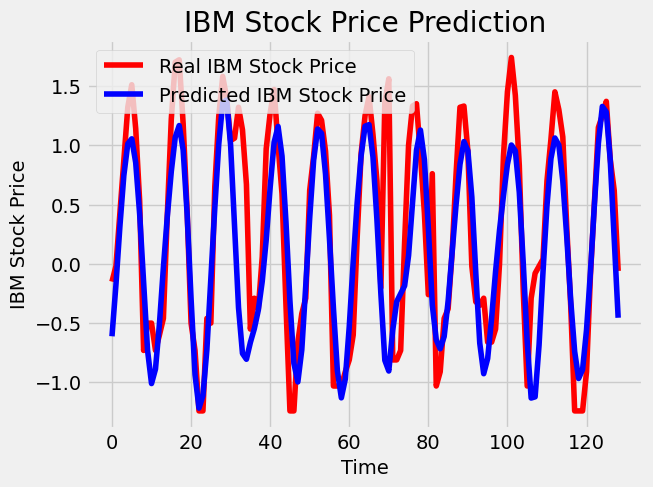

In [21]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [22]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 0.5465676986415872.


In [23]:
evaluation_metrics = calculate_evaluation_metrics(test_set,GRU_predicted_stock_price)
print(evaluation_metrics)

{'ME': 0.16598625123110966, 'MAE': 0.3758188984969039, 'MSE': 0.2987362491983608, 'RMSE': 0.5465676986415872, 'NRMSE': 0.18341197940992857, 'PBIAS': 59.64408470421491, 'RSR': 0.6185807893842339, 'rSD': 0.5893660963312074, 'NSE': 0.617357807004778, 'mNSE': 0.617357807004778, 'rNSE': 0.7907548741370668, 'd': 0.8848959944999425, 'md': 0.8848959944999425, 'rd': 0.8848959944999425, 'cp': 0.8848959944999425, 'r': 0.8848959944999425, 'R2': 0.617357807004778}
